# FAKE NEWS DETECTION USING CNN

Using dataset from kaggle provided by Hassan Amin.

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string
from sklearn.metrics import precision_recall_curve

In [ ]:
#Reading data from csv file
#new_data = pd.read_csv("./fake_or_real_news")

# from google.colab import drive
# drive.mount('/content/drive')
# path = '/content/drive/MyDrive/DL_Dataset/fake_or_real_news.csv'
new_data = pd.read_csv('./Dataset/fake_or_real_news.csv');

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
new_data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


**Data Pre-processing**

Removing Columns which are not required

In [ ]:
new_data.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

Merging title with text

In [ ]:
new_data['text']=new_data['title'] + new_data['text']

In [ ]:
new_data = new_data.drop(["Unnamed: 0", "title"], axis = 1)

Convert categorical data of label to binary

In [ ]:
new_data.head(10)

,text,label
0,"You Can Smell Hillary’s FearDaniel Greenfield,...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,FAKE
2,Kerry to go to Paris in gesture of sympathyU.S...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,FAKE
4,The Battle of New York: Why This Primary Matte...,REAL
5,"Tehran, USA \nI’m not an immigrant, but my gr...",FAKE
6,Girl Horrified At What She Watches Boyfriend D...,FAKE
7,‘Britain’s Schindler’ Dies at 106A Czech stock...,REAL
8,Fact check: Trump and Clinton at the 'commande...,REAL
9,Iran reportedly makes new push for uranium con...,REAL


In [ ]:
new_data_one = pd.get_dummies(new_data["label"])

In [ ]:
news_data_two = pd.concat((new_data_one, new_data), axis=1)

In [ ]:
news_data_two = news_data_two.drop(["label"], axis=1)


In [ ]:
news_data_two = news_data_two.drop(["REAL"], axis=1)

Save the categorical data

In [ ]:
dframe=new_data

Converted Binary result

In [ ]:
new_data = news_data_two.rename(columns={"FAKE": "label"})
new_data

,label,text
0,1,"You Can Smell Hillary’s FearDaniel Greenfield,..."
1,1,Watch The Exact Moment Paul Ryan Committed Pol...
2,0,Kerry to go to Paris in gesture of sympathyU.S...
3,1,Bernie supporters on Twitter erupt in anger ag...
4,0,The Battle of New York: Why This Primary Matte...
...,...,...
6330,0,State Department says it can't find emails fro...
6331,1,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332,1,Anti-Trump Protesters Are Tools of the Oligarc...
6333,0,"In Ethiopia, Obama seeks progress on peace, se..."


Removing puntuations

In [ ]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [ ]:
new_data["text"] = new_data["text"].apply(wordopt)

Removing Stop words

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

Stemming and lammetization

In [ ]:
stemmer = PorterStemmer()
def stem_text(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            word = stemmer.stem(i.strip())
            final_text.append(word)
    return " ".join(final_text)    

In [ ]:
new_data.text = new_data.text.apply(stem_text)

Word Cloud

In [ ]:
from wordcloud import WordCloud,STOPWORDS

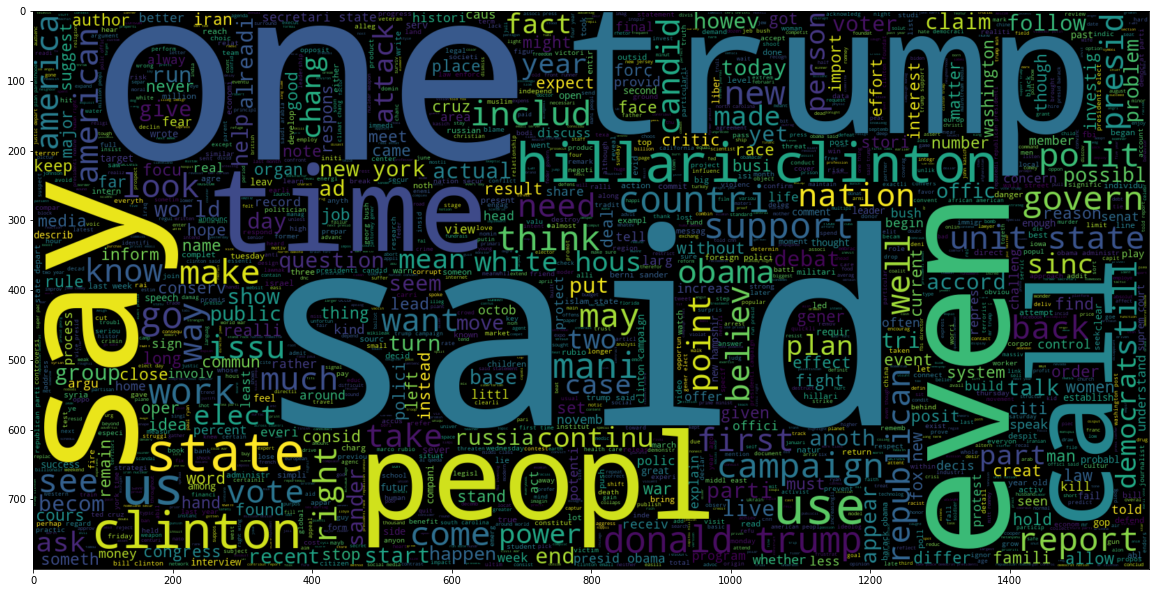

In [ ]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 3000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(new_data.text))
plt.imshow(wc , interpolation = 'bilinear')

Defining dependent and independent variables

In [ ]:
feature = new_data["text"]
target = new_data["label"]

Splitting the dataset

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.25)

**CNN**

In [ ]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from bs4 import BeautifulSoup
import unicodedata
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from string import punctuation
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

Text to vector conversion

In [ ]:
cv=CountVectorizer(min_df=0,max_df=1,ngram_range=(1,2))
#transformed train reviews
cv_train_reviews=cv.fit_transform(x_train)
#transformed test reviews
cv_test_reviews=cv.transform(x_test)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

BOW_cv_train: (4751, 866459)
BOW_cv_test: (1584, 866459)


**Defining the Model**

In [ ]:
model = Sequential()
model.add(Dense(units = 100 , activation = 'relu' , input_dim = cv_train_reviews.shape[1]))
model.add(Dense(units = 50 , activation = 'relu'))
model.add(Dense(units = 25 , activation = 'relu'))
model.add(Dense(units = 10 , activation = 'relu'))
model.add(Dense(units = 1 , activation = 'sigmoid'))

Compile the model

In [ ]:
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [ ]:
model.fit(cv_train_reviews,y_train , epochs = 5)

Epoch 1/5


InvalidArgumentError: ignored

Prediction and accuracy

In [ ]:
pred = model.predict(cv_test_reviews)

In [ ]:
binary_predictions = []
for i in pred:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0)

In [ ]:
print('Accuracy on testing set:', accuracy_score(binary_predictions, y_test))

#Evaluation

In [ ]:
cv_report = classification_report(y_test,binary_predictions,target_names = ['0','1'])
print(cv_report)

Confusion Matrix

In [ ]:
cm_cv = confusion_matrix(y_test,binary_predictions)
cm_cv

In [ ]:
cm_cv = pd.DataFrame(cm_cv, index=[0,1], columns=[0,1])
cm_cv.index.name = 'Actual'
cm_cv.columns.name = 'Predicted'

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(cm_cv,cmap= "Blues",annot = True, fmt='')